<a href="https://colab.research.google.com/github/johanaluna/DS-Unit-2-Regression-Classification/blob/master/module1/Johana_DS7_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
#FIRST:
# Look at the data. What's the distribution of the target, price,
# and features such as longitude and latitude? Remove outliers.

In [38]:
df.head()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0     1.5000         3  ...                 0                    0
1     1.0000         2  ...                 0                    0
2     1.0000         1  ...                 0                    0
3     1.0000         1  ...                 0                    0
4     1.0000         4  ...                 0                    0

[5 rows x 34 columns]

In [39]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [0]:
df.columns = [col.replace(' ', '_') for col in df]

In [41]:
df['created'].describe()

count                   49352
unique                  48675
top       2016-06-12 13:20:45
freq                        3
Name: created, dtype: object

In [0]:
df['created']=pd.to_datetime(df['created'], infer_datetime_format=True)#change CREATED to data format

In [43]:
df['created'].describe() #Just two months

count                   49352
unique                  48675
top       2016-06-05 01:32:36
freq                        3
first     2016-04-01 22:12:41
last      2016-06-29 21:41:47
Name: created, dtype: object

In [44]:
list(df.columns)#List columns to decide which column analize 

['bathrooms',
 'bedrooms',
 'created',
 'description',
 'display_address',
 'latitude',
 'longitude',
 'price',
 'street_address',
 'interest_level',
 'elevator',
 'cats_allowed',
 'hardwood_floors',
 'dogs_allowed',
 'doorman',
 'dishwasher',
 'no_fee',
 'laundry_in_building',
 'fitness_center',
 'pre-war',
 'laundry_in_unit',
 'roof_deck',
 'outdoor_space',
 'dining_room',
 'high_speed_internet',
 'balcony',
 'swimming_pool',
 'new_construction',
 'terrace',
 'exclusive',
 'loft',
 'garden_patio',
 'wheelchair_access',
 'common_outdoor_space']

In [45]:
df['price'].head() #check column PRICE

0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64

In [46]:
pd.options.display.float_format = '{:,.4f}'.format
df.describe()

bathrooms    bedrooms  ...  wheelchair_access  common_outdoor_space
count 49,352.0000 49,352.0000  ...        49,352.0000           49,352.0000
mean       1.2122      1.5416  ...             0.0275                0.0262
std        0.5014      1.1150  ...             0.1636                0.1597
min        0.0000      0.0000  ...             0.0000                0.0000
25%        1.0000      1.0000  ...             0.0000                0.0000
50%        1.0000      1.0000  ...             0.0000                0.0000
75%        1.0000      2.0000  ...             0.0000                0.0000
max       10.0000      8.0000  ...             1.0000                1.0000

[8 rows x 29 columns]

In [47]:
df.describe(exclude='number')

created description  ... street_address interest_level
count                 49352       47906  ...          49342          49352
unique                48675       38243  ...          15357              3
top     2016-06-05 01:32:36              ...  3333 Broadway            low
freq                      3        1647  ...            174          34284
first   2016-04-01 22:12:41         NaN  ...            NaN            NaN
last    2016-06-29 21:41:47         NaN  ...            NaN            NaN

[6 rows x 5 columns]

In [48]:
#check max values in price
df.query('price==4490000')

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
19558     1.0000         2  ...                 0                    0

[1 rows x 34 columns]

In [49]:
df.query('price==1150000 ')

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
9590     1.0000         2  ...                 0                    0

[1 rows x 34 columns]

In [50]:
#Check min values in price
#looks weird that the rent is just 43 dolars 
df.query('price==43')

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
28626     1.0000         0  ...                 0                    0

[1 rows x 34 columns]

In [51]:
df['price'].value_counts().sort_values(ascending=False) #check that values in the column PRICE are in the context

2500       1106
3200        881
3000        840
2700        777
2400        772
2600        707
3500        691
2800        669
2300        643
3400        637
2200        630
3300        611
3100        590
2100        585
2900        561
4000        536
3600        515
2000        508
2750        506
2350        487
2650        480
4500        471
1900        455
5000        454
2995        448
2850        445
2450        443
2950        405
1850        404
2550        368
           ... 
2464          1
3204          1
3933          1
4835          1
7270          1
3781          1
3813          1
5862          1
1150000       1
1796          1
5155          1
4413          1
5255          1
6918          1
6594          1
2852          1
3261          1
2238          1
6722          1
5246          1
2624          1
6460          1
4711          1
6492          1
7430          1
11257         1
4387          1
3268          1
3236          1
8340          1
Name: price, Length: 280

In [0]:
# Look at the data. What's the distribution of the target, price,
# and features such as longitude and latitude? Remove outliers.

In [51]:
#plot latitude vs price
px.scatter(df,x='latitude', y='price') #there are some suspissius point that are in the extreme

In [48]:
#add trendline
px.scatter(df,x='latitude', y='price', trendline='ols')

In [52]:
#plot longitude vs price
px.scatter(df, x='longitude',y='price')

In [50]:
#addtrendline
px.scatter(df, x='longitude',y='price', trendline='ols')

In [54]:
df.query('price> 1000000')


bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
9590      1.0000         2  ...                 0                    0
19558     1.0000         2  ...                 0                    0
29665     1.0000         1  ...                 0                    0
30689     1.0000         1  ...                 0                    0

[4 rows x 34 columns]

In [57]:
#Keep rows where price < 1000000
df=df.query('price< 1000000')
df['price'].describe()

count    49,348.0000
mean      3,672.8287
std       2,535.4090
min          43.0000
25%       2,500.0000
50%       3,150.0000
75%       4,100.0000
max     135,000.0000
Name: price, dtype: float64

In [0]:
df=df.query('price>43')

In [59]:
df.shape

(49347, 34)

In [61]:
#check describe after drop outliner
#mean $3,672.9022
df['price'].describe()

count    49,347.0000
mean      3,672.9022
std       2,535.3821
min          45.0000
25%       2,500.0000
50%       3,150.0000
75%       4,100.0000
max     135,000.0000
Name: price, dtype: float64

In [62]:
#I made a histogram to visualize my distribution in my column price 
fig = px.histogram(df, x="price")
fig.show()

In [0]:
# After you remove outliers, what is the mean price in your subset of the data?

In [63]:
df['price'].mean()

3672.9022230328083

In [67]:
#Choose a feature, and plot its relationship with the target.

df.head()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0     1.5000         3  ...                 0                    0
1     1.0000         2  ...                 0                    0
2     1.0000         1  ...                 0                    0
3     1.0000         1  ...                 0                    0
4     1.0000         4  ...                 0                    0

[5 rows x 34 columns]

In [76]:
#re-plot the relationship between #number of bedrooms(feature) and price (target) 

px.scatter(df, y='price', x='bedrooms', trendline='ols')

In [0]:

#  Use scikit-learn for linear regression with one feature. You can follow the 5-step process from Jake VanderPlas.


In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
features=['bedrooms']
target='price'
X=df[features] #Training data
y=df[target] #target values

#fit the model: means learn from the model.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
#apply the model
y_pred=model.predict(X)
y_pred

array([5133.60237159, 4131.97419318, 3130.34601478, ..., 3130.34601478,
       2128.71783637, 4131.97419318])

In [83]:
model.coef_ #slope

array([1001.62817841])

In [84]:
model.intercept_ #intercept

2128.717836368047

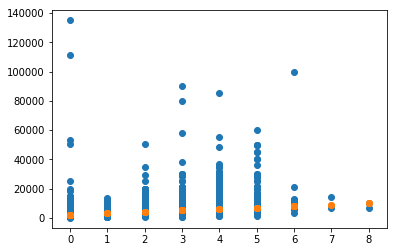

In [85]:
#plotting actual vs. predicted prices
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.scatter(X, y_pred);

In [110]:
#  Define a function to make new predictions and explain the model coefficient.
#Apply themodel to *new/unknown* data

def predict(bedrooms):
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  print('The price for an apartment with', bedrooms, 'bedrooms is $',f'${estimate:,.0f}', '\nand each additional bedroom is associated with a ,',f'${coefficient:,.0f} increase in this model' )
predict(2)

The price for an apartment with 2 bedrooms is $ $4,132 
and each additional bedroom is associated with a , $1,002 increase in this model


In [111]:
predict(5)

The price for an apartment with 5 bedrooms is $ $7,137 
and each additional bedroom is associated with a , $1,002 increase in this model


In [114]:
predict(8)

The price for an apartment with 8 bedrooms is $ $10,142 
and each additional bedroom is associated with a , $1,002 increase in this model


In [112]:
df['price'].describe()

count    49,347.0000
mean      3,672.9022
std       2,535.3821
min          45.0000
25%       2,500.0000
50%       3,150.0000
75%       4,100.0000
max     135,000.0000
Name: price, dtype: float64

In [113]:
df['bedrooms'].describe()

count   49,347.0000
mean         1.5417
std          1.1150
min          0.0000
25%          1.0000
50%          1.0000
75%          2.0000
max          8.0000
Name: bedrooms, dtype: float64

In [115]:
from ipywidgets import interact
interact(predict, bedrooms=(0, 8)); # (min, max)

interactive(children=(IntSlider(value=4, description='bedrooms', max=8), Output()), _dom_classes=('widget-inte…

# ORGANIZE AND COMMENT THE CODE

In [0]:
from ipywidgets import interact
import pandas as pd
from sklearn.linear_model import LinearRegression

In [120]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Change column names. Replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

#Change the type in the column created to datetime
df['created']=pd.to_datetime(df['created'], infer_datetime_format=True)

# Keep subset of rows:
# Tribeca neighborhood, Condos - Elevator Apartments, 
# 1 unit, sale price more than $1, less than $35 million
mask = (
    (df['price']< 1000000) & 
    (df['price']>43))
df = df[mask]

# Arrange X features matrix & y target vector
features=['bedrooms']
target='price'
X=df[features] #Training data
y=df[target] #target values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
def predict(bedrooms):
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  return ('The price for an apartment with', bedrooms, 'bedrooms is $',f'${estimate:,.0f}', '\nand each additional bedroom is associated with a ,',f'${coefficient:,.0f} increase in this model' )


interact(predict, bedrooms=(0, 8)); # (min, max)

interactive(children=(IntSlider(value=4, description='bedrooms', max=8), Output()), _dom_classes=('widget-inte…